<a href="https://colab.research.google.com/github/gregorywmorris/guided_projects/blob/main/time_series/introduction_to_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Book: [Introduction to Time Series Forecasting with Python](https://machinelearningmastery.com/introduction-to-time-series-forecasting-with-python/)

Author: Jason Brownlee


# Chapter 5 Basic Feature Engineering

[data set](https://github.com/jbrownlee/Datasets/blob/master/shampoo.csv)

In [ ]:
from pandas import read_csv

series = read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
series.head()

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

In [ ]:
from pandas import read_csv
from pandas import DataFrame
series = read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
# create date time features of a dataset
dataframe = DataFrame()
#dataframe.assign('month','day','temperature')
dataframe['date'] = [series.index[i] for i in range(len(series))]
dataframe['month'] = [series.index[i].month for i in range(len(series))]
dataframe['day'] = [series.index[i].day for i in range(len(series))]
dataframe['temperature'] = [series[i] for i in range(len(series))]
print(dataframe.head())

        date  month  day  temperature
0 1981-01-01      1    1         20.7
1 1981-01-02      1    2         17.9
2 1981-01-03      1    3         18.8
3 1981-01-04      1    4         14.6
4 1981-01-05      1    5         15.8


You may enumerate all the
properties of a time-stamp and consider what might be useful for your problem, such as:
* Minutes elapsed for the day.
* Hour of day.
* Business hours or not.
Weekend or not.
* Season of the year.
* Business quarter of the year.
* Daylight savings or not.
* Public holiday or not.
* Leap year or not.

In [ ]:
# create a lag feature
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
temps = DataFrame(series.values)
dataframe = concat([temps.shift(1), temps], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe.head(5))

      t   t+1
0   NaN  20.7
1  20.7  17.9
2  17.9  18.8
3  18.8  14.6
4  14.6  15.8


In [ ]:
# create lag features
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = pd.read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
temps = DataFrame(series.values)
dataframe = concat([temps.shift(3), temps.shift(2), temps.shift(1), temps], axis=1)
dataframe.columns = ['t-2', 't-1', 't', 't+1']
print(dataframe.head(5))


    t-2   t-1     t   t+1
0   NaN   NaN   NaN  20.7
1   NaN   NaN  20.7  17.9
2   NaN  20.7  17.9  18.8
3  20.7  17.9  18.8  14.6
4  17.9  18.8  14.6  15.8


A difficulty with the sliding window approach is how large to make
the window for your problem. Perhaps a good starting point is to perform a sensitivity analysis
and try a suite of different window widths to in turn create a suite of different views of your
dataset and see which results in better performing models. There will be a point of diminishing
returns.

Additionally, why stop with a linear window? Perhaps you need a lag value from last week,
last month, and last year. Again, this comes down to the specific domain. In the case of the
temperature dataset, a lag value from the same day in the previous year or previous few years
may be useful.

In [ ]:
series = pd.read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
temps = DataFrame(series.values)
temps.dtypes

0    float64
dtype: object

In [ ]:
# create a rolling mean feature
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = pd.read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
temps = DataFrame(series.values)
shifted = temps.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
dataframe = concat([means, temps], axis=1)
dataframe.columns = ['mean(t-1,t)', 't+1']
print(dataframe.head(5))

   mean(t-1,t)   t+1
0          NaN  20.7
1          NaN  17.9
2        19.30  18.8
3        18.35  14.6
4        16.70  15.8


In [ ]:
# create rolling statistics features
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = pd.read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
temps = DataFrame(series.values)
width = 3
shifted = temps.shift(width - 1)
window = shifted.rolling(window=width)
dataframe = concat([window.min(), window.mean(), window.max(), temps], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head())

    min       mean   max   t+1
0   NaN        NaN   NaN  20.7
1   NaN        NaN   NaN  17.9
2   NaN        NaN   NaN  18.8
3   NaN        NaN   NaN  14.6
4  17.9  19.133333  20.7  15.8


In [ ]:
# create expanding window features
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = pd.read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
temps = DataFrame(series.values)
window = temps.expanding()
dataframe = concat([window.min(), window.mean(), window.max(), temps.shift(-1)], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))


    min       mean   max   t+1
0  20.7  20.700000  20.7  17.9
1  17.9  19.300000  20.7  18.8
2  17.9  19.133333  20.7  14.6
3  14.6  18.000000  20.7  15.8
4  14.6  17.560000  20.7  15.8


[Rolling vs Expanding](https://medium.com/@philippetousignant/forecasting-with-python-expanding-and-rolling-window-fa0be5545940#:~:text=Expanding%20window%20refers%20to%20a,of%20data%20in%20our%20model.)



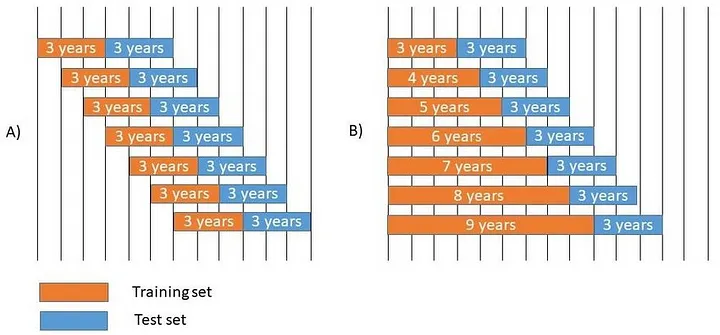

# Chapter 6 Data Visualization

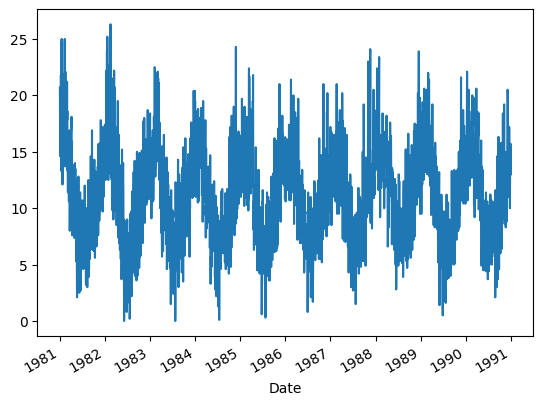

In [ ]:
# create a line plot
from pandas import read_csv
from matplotlib import pyplot
series = pd.read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
series.plot()
pyplot.show()
# notice how dense the plot is

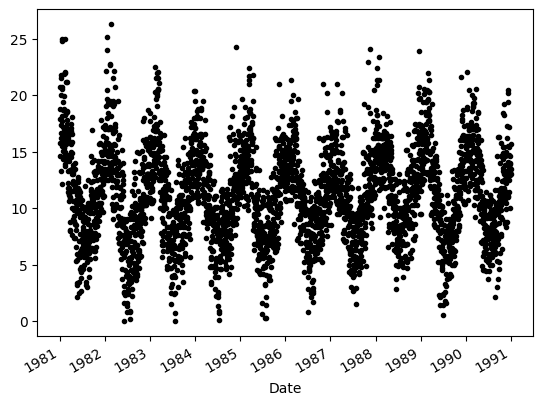

In [ ]:
# create a dot plot
from pandas import read_csv
from matplotlib import pyplot
series = pd.read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
series.plot(style='k.')
pyplot.show()

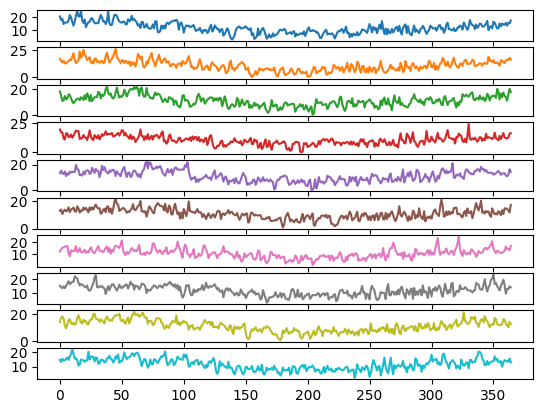

In [ ]:
# create stacked line plots
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
series = pd.read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
groups = series.groupby(Grouper(freq='A')) # annual grouping
years = DataFrame()
for name, group in groups:
  years[name.year] = group.values
years.plot(subplots=True, legend=False)
pyplot.show()
# Running the example creates 10 line plots, one for each year (only 10 years in dataset).
# From 1981 at the top and 1990 at the bottom, where each line plot is 365 days in length.

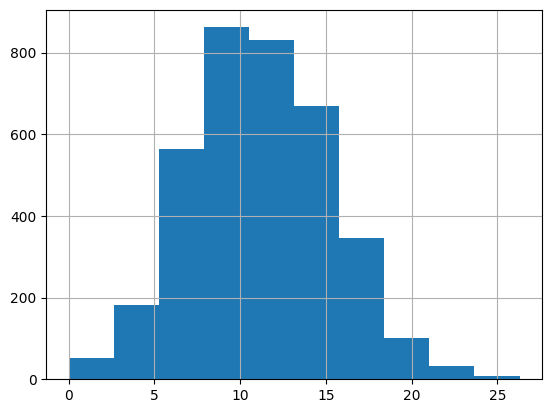

In [ ]:
# create a histogram plot
from pandas import read_csv
from matplotlib import pyplot
series = pd.read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
series.hist()
pyplot.show()

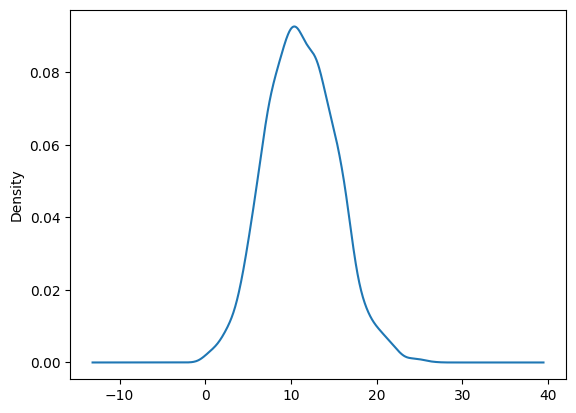

In [ ]:
# create a density plot
from pandas import read_csv
from matplotlib import pyplot
series = pd.read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
series.plot(kind='kde') # kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF)
pyplot.show()

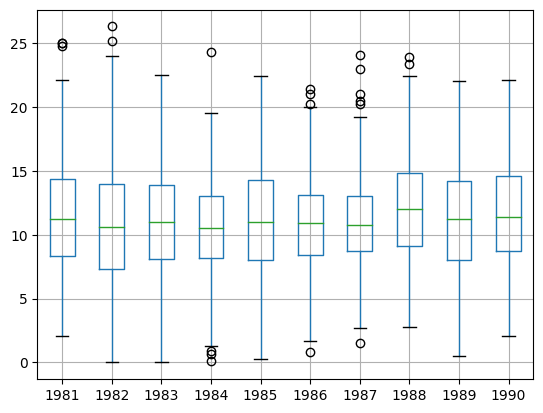

In [ ]:
# create a boxplot of yearly data
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
series = pd.read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
  years[name.year] = group.values
years.boxplot()
pyplot.show()

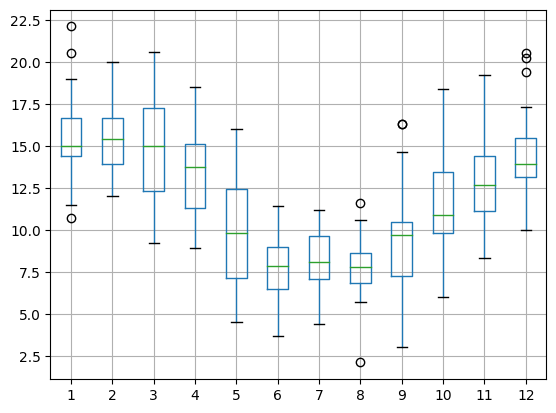

In [ ]:
# create a boxplot of monthly data
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
from pandas import concat
series = pd.read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
one_year = series['1990']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
months.boxplot()
pyplot.show()

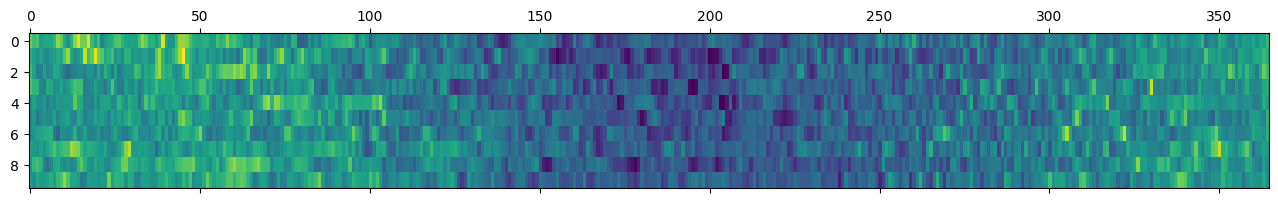

In [ ]:
# create a heat map of yearly data
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
series = pd.read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
  years[name.year] = group.values
years = years.T # Rotated (transposed) so that each row represents one year and each column one day. This provides a more intuitive, left-to-right layout of the data.
pyplot.matshow(years, interpolation=None, aspect='auto')
pyplot.show()

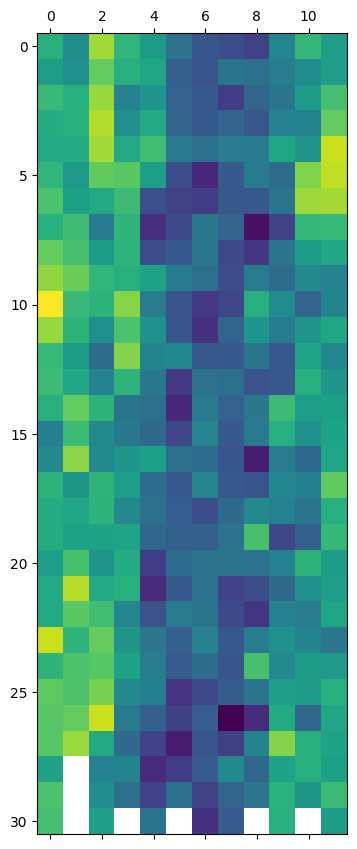

In [ ]:
# create a heat map of monthly data
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
from pandas import concat
series = pd.read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
one_year = series['1990']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
pyplot.matshow(months, interpolation=None, aspect='auto')
pyplot.show()
# white patches are for months with less than 31 days

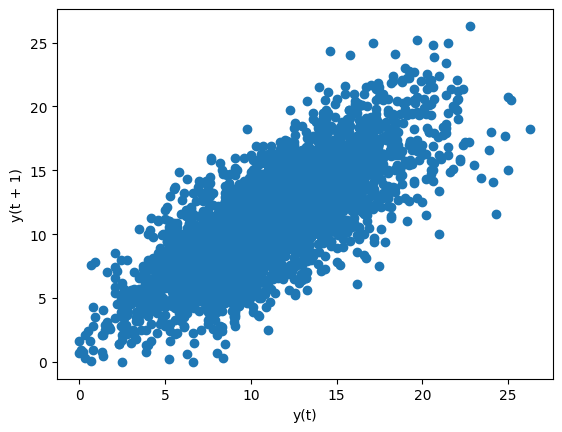

In [ ]:
# create a scatter plot
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
series = pd.read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
lag_plot(series)
pyplot.show()

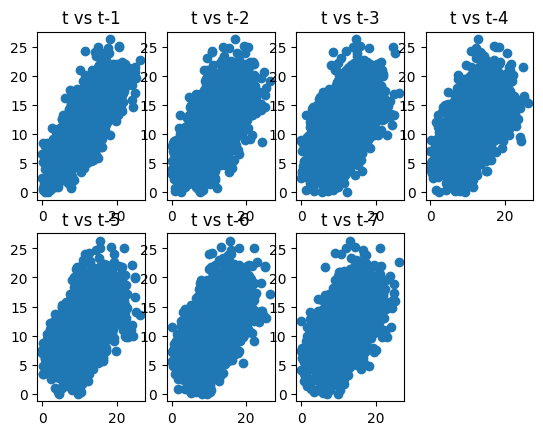

In [ ]:
# create multiple scatter plots
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = pd.read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
values = DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
  columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
  columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1)
for i in range(1,(lags + 1)):
  ax = pyplot.subplot(240 + i)
  ax.set_title('t vs t-' + str(i))
  pyplot.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()

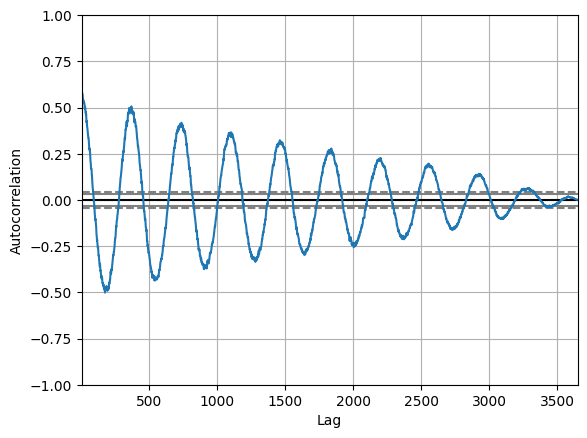

In [ ]:
# create an autocorrelation plot
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
series = pd.read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
autocorrelation_plot(series)
pyplot.show()
# Sine waves like those seen in this example are a strong sign of seasonality in the dataset.

# Chapter 7 Resampling and Interpoation

[Data Set](https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv)

Types:
* **Upsampling**: Where you increase the frequency of the samples, such as from minutes to
seconds.
* **Downsampling**: Where you decrease the frequency of the samples, such as from days to
months.

Reasons:

* **Problem Framing**: Resampling may be required if your data is not available at the
same frequency that you want to make predictions.
* **Feature Engineering**: Resampling can also be used to provide additional structure or insight into the learning problem for supervised learning models.

There is a lot of overlap between these two cases. For example, you may have daily data and want to predict a monthly problem. You could use the daily data directly or you could downsample it to monthly data and develop your model. A feature engineering perspective may use observations and summaries of observations from both time scales and more in developing a model.

In [ ]:
# upsample to daily intervals
from pandas import read_csv
from pandas import datetime

# Function to parse dates to 1900's
def parser(x):
  return datetime.strptime('190'+x, '%Y-%m')

# Notice parser function is called
series = pd.read_csv('shampoo-sales.csv', parse_dates=True, header=0,index_col=0, date_parser=parser, on_bad_lines='skip').squeeze('columns')

# Resample creates rows by puting NaN values in new rows
upsampled = series.resample('D').mean()
print(upsampled.head(32))

Month
1901-01-01    266.0
1901-01-02      NaN
1901-01-03      NaN
1901-01-04      NaN
1901-01-05      NaN
1901-01-06      NaN
1901-01-07      NaN
1901-01-08      NaN
1901-01-09      NaN
1901-01-10      NaN
1901-01-11      NaN
1901-01-12      NaN
1901-01-13      NaN
1901-01-14      NaN
1901-01-15      NaN
1901-01-16      NaN
1901-01-17      NaN
1901-01-18      NaN
1901-01-19      NaN
1901-01-20      NaN
1901-01-21      NaN
1901-01-22      NaN
1901-01-23      NaN
1901-01-24      NaN
1901-01-25      NaN
1901-01-26      NaN
1901-01-27      NaN
1901-01-28      NaN
1901-01-29      NaN
1901-01-30      NaN
1901-01-31      NaN
1901-02-01    145.9
Freq: D, Name: Sales, dtype: float64


<ipython-input-45-2eb1944f9f59>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Interpolation is a method for generating points between given points. For example: for points 1 and 2, we may interpolate and find points 266 and 145.9. Interpolation has many usage, in Machine Learning we often deal with missing data in a dataset, interpolation is often used to substitute those values.

<ipython-input-46-3ae572313e2a>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Month
1901-01-01    266.000000
1901-01-02    262.125806
1901-01-03    258.251613
1901-01-04    254.377419
1901-01-05    250.503226
1901-01-06    246.629032
1901-01-07    242.754839
1901-01-08    238.880645
1901-01-09    235.006452
1901-01-10    231.132258
1901-01-11    227.258065
1901-01-12    223.383871
1901-01-13    219.509677
1901-01-14    215.635484
1901-01-15    211.761290
1901-01-16    207.887097
1901-01-17    204.012903
1901-01-18    200.138710
1901-01-19    196.264516
1901-01-20    192.390323
1901-01-21    188.516129
1901-01-22    184.641935
1901-01-23    180.767742
1901-01-24    176.893548
1901-01-25    173.019355
1901-01-26    169.145161
1901-01-27    165.270968
1901-01-28    161.396774
1901-01-29    157.522581
1901-01-30    153.648387
1901-01-31    149.774194
1901-02-01    145.900000
Freq: D, Name: Sales, dtype: float64


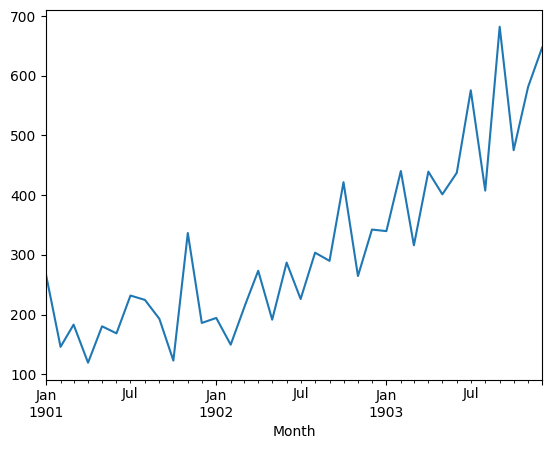

In [ ]:
# upsample to daily intervals
from pandas import read_csv
from pandas import datetime

# Function to parse dates to 1900's
def parser(x):
  return datetime.strptime('190'+x, '%Y-%m')

# Notice parser function is called
series = pd.read_csv('shampoo-sales.csv', parse_dates=True, header=0,index_col=0, date_parser=parser, on_bad_lines='skip').squeeze('columns')

# Resample creates rows by puting NaN values in new rows
upsampled = series.resample('D').mean()

# Interpolate missing values
interpolated = upsampled.interpolate(method='linear')

print(interpolated.head(32))
interpolated.plot()
pyplot.show()

<ipython-input-43-016a63cda95b>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Month
1901-01-01    266.000000
1901-01-02    258.630160
1901-01-03    251.560886
1901-01-04    244.720748
1901-01-05    238.109746
1901-01-06    231.727880
1901-01-07    225.575149
1901-01-08    219.651553
1901-01-09    213.957094
1901-01-10    208.491770
1901-01-11    203.255582
1901-01-12    198.248529
1901-01-13    193.470612
1901-01-14    188.921831
1901-01-15    184.602185
1901-01-16    180.511676
1901-01-17    176.650301
1901-01-18    173.018063
1901-01-19    169.614960
1901-01-20    166.440993
1901-01-21    163.496161
1901-01-22    160.780465
1901-01-23    158.293905
1901-01-24    156.036481
1901-01-25    154.008192
1901-01-26    152.209039
1901-01-27    150.639021
1901-01-28    149.298139
1901-01-29    148.186393
1901-01-30    147.303783
1901-01-31    146.650308
1901-02-01    145.900000
Freq: D, Name: Sales, dtype: float64


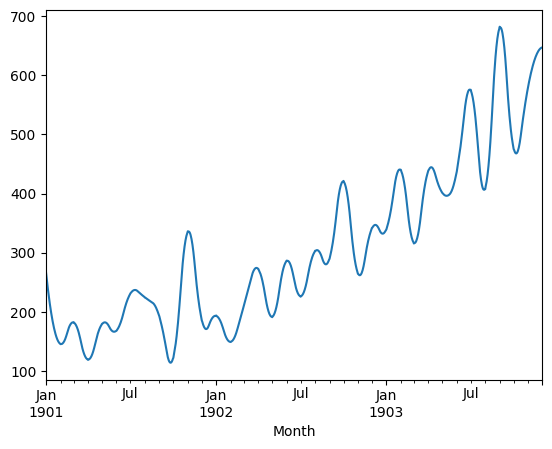

In [ ]:
# upsample to daily intervals with spline interpolation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
  return datetime.strptime('190'+x, '%Y-%m')

series = pd.read_csv('shampoo-sales.csv', parse_dates=True, header=0,index_col=0, date_parser=parser, on_bad_lines='skip').squeeze('columns')

upsampled = series.resample('D').mean()
interpolated = upsampled.interpolate(method='spline', order=2)

print(interpolated.head(32))
interpolated.plot()
pyplot.show()


<ipython-input-49-7c9e1be18221>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Month
1901-03-31    198.333333
1901-06-30    156.033333
1901-09-30    216.366667
1901-12-31    215.100000
1902-03-31    184.633333
Freq: Q-DEC, Name: Sales, dtype: float64


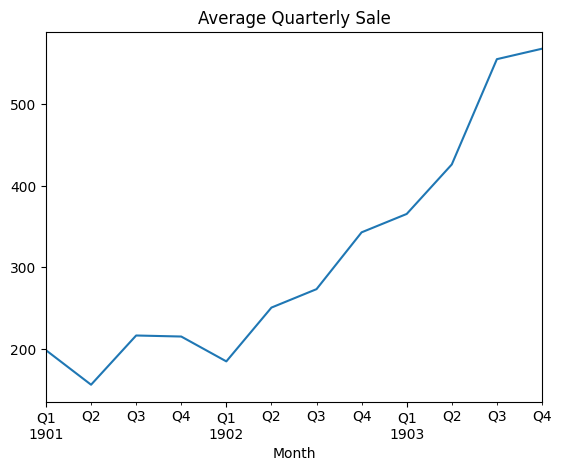

In [ ]:
# downsample to quarterly intervals
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
  return datetime.strptime('190'+x, '%Y-%m')
series = pd.read_csv('shampoo-sales.csv', parse_dates=True, header=0,index_col=0, date_parser=parser, on_bad_lines='skip').squeeze('columns')

resample = series.resample('Q')
quarterly_mean_sales = resample.mean()
print(quarterly_mean_sales.head())
quarterly_mean_sales.plot()
pyplot.title('Average Quarterly Sale')
pyplot.show()

<ipython-input-50-fd09d69306b5>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Month
1901-12-31    2357.5
1902-12-31    3153.5
1903-12-31    5742.6
Freq: A-DEC, Name: Sales, dtype: float64


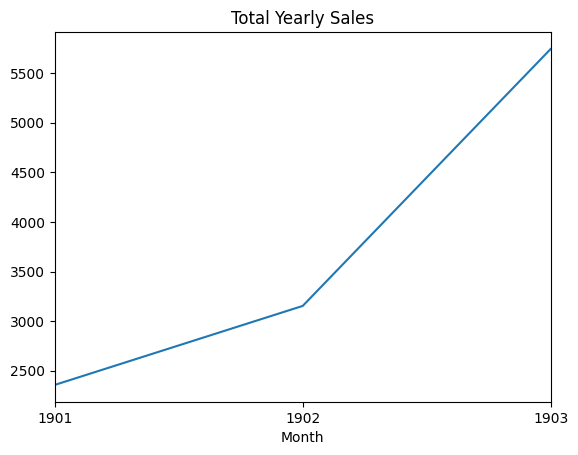

In [ ]:
# downsample to yearly intervals
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
  return datetime.strptime('190'+x, '%Y-%m')
series = pd.read_csv('shampoo-sales.csv', parse_dates=True, header=0,index_col=0, date_parser=parser, on_bad_lines='skip').squeeze('columns')

resample = series.resample('A')
yearly_mean_sales = resample.sum()
print(yearly_mean_sales.head())
yearly_mean_sales.plot()
pyplot.title("Total Yearly Sales")
pyplot.show()

# Chapter 8 Power Transforms

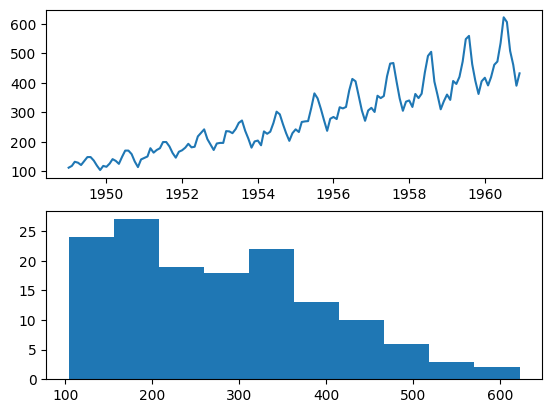

In [ ]:
# load and plot a time series
from pandas import read_csv
from matplotlib import pyplot
series = pd.read_csv('airline-passengers.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()

## square root transform

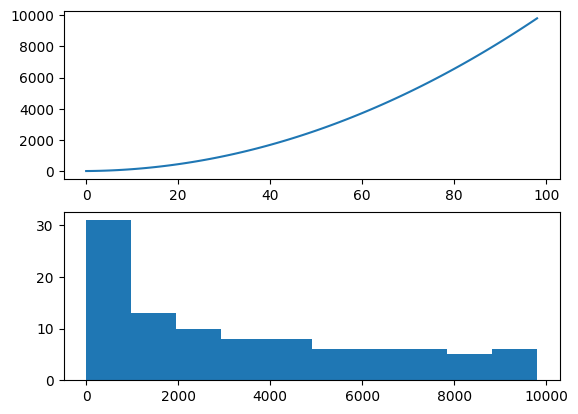

In [ ]:
# contrive a quadratic time series
from matplotlib import pyplot
series = [i**2 for i in range(1,100)]
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()

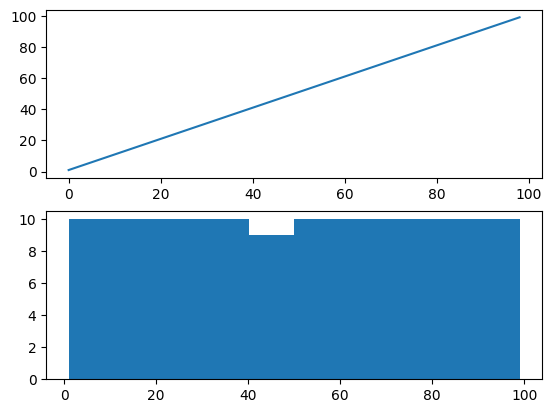

In [ ]:
# square root transform a contrived quadratic time series
from matplotlib import pyplot
from numpy import sqrt
series = [i**2 for i in range(1,100)]
# sqrt transform
transform = series = sqrt(series)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(transform)
# histogram
pyplot.subplot(212)
pyplot.hist(transform)
pyplot.show()

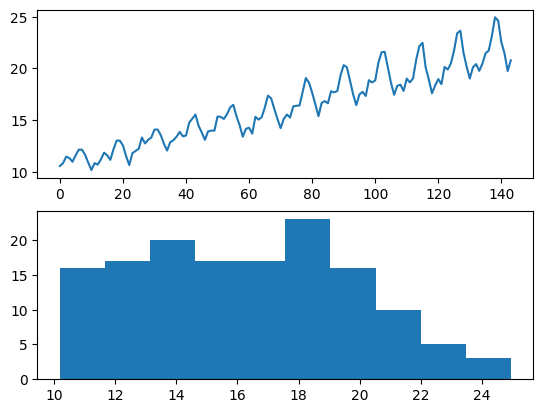

In [ ]:
# square root transform a time series
from pandas import read_csv
from pandas import DataFrame
from numpy import sqrt
from matplotlib import pyplot
series = pd.read_csv('airline-passengers.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = sqrt(dataframe['passengers'])
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

We can see that the trend was reduced, but was not removed. The line plot still shows an
increasing variance from cycle to cycle. The histogram still shows a long tail to the right of the
distribution, suggesting an exponential or long-tail distribution.

## Log Transform

(array([96.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([2.71828183e+00, 9.88903032e+41, 1.97780606e+42, 2.96670910e+42,
        3.95561213e+42, 4.94451516e+42, 5.93341819e+42, 6.92232122e+42,
        7.91122426e+42, 8.90012729e+42, 9.88903032e+42]),
 <BarContainer object of 10 artists>)

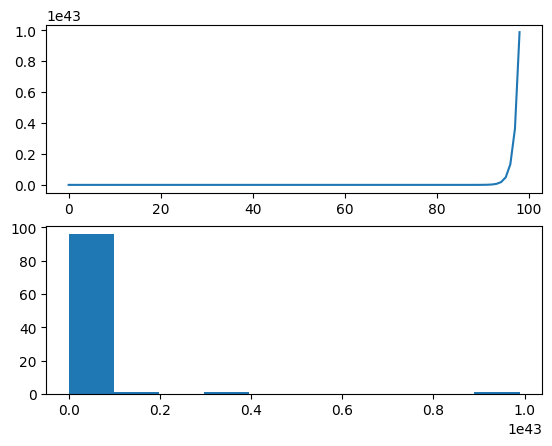

In [ ]:
# create and plot an exponential time series
from matplotlib import pyplot
from math import exp
series = [exp(i) for i in range(1,100)]
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)

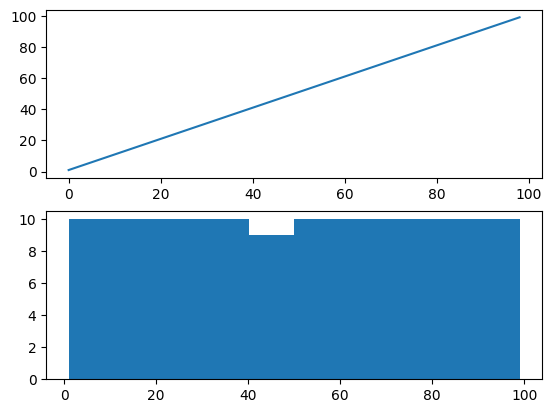

In [ ]:
# log transform a contrived exponential time series
from matplotlib import pyplot
from math import exp
from numpy import log
series = [exp(i) for i in range(1,100)]
transform = log(series)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(transform)
# histogram
pyplot.subplot(212)
pyplot.hist(transform)
pyplot.show()

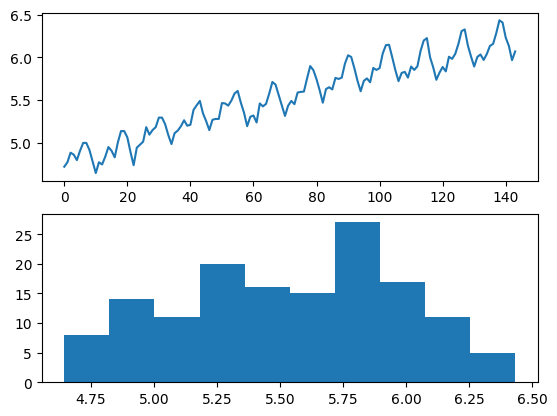

In [ ]:
# log transform a time series
from pandas import read_csv
from pandas import DataFrame
from numpy import log
from matplotlib import pyplot
series = pd.read_csv('airline-passengers.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = log(dataframe['passengers'])
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

## Box-Cox Transform


Common values for lambda:
* lambda = -1.0 is a reciprocal transform.
* lambda = -0.5 is a reciprocal square root transform.
* lambda = 0.0 is a log transform.
* lambda = 0.5 is a square root transform.
* lambda = 1.0 is no transform.

Set the lambda parameter to None (the default) and let the function find a statistically tuned value.

Lambda: 0.148023


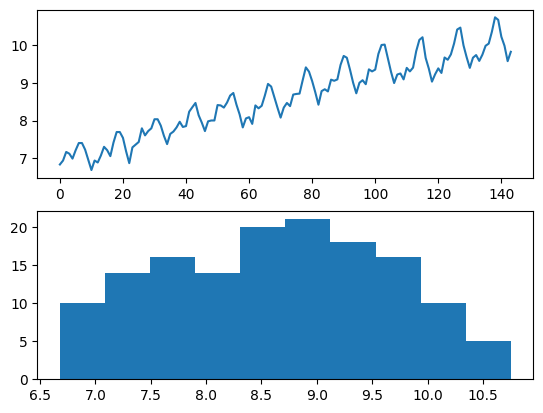

In [ ]:
# automatically box-cox transform a time series
from pandas import read_csv
from pandas import DataFrame
from scipy.stats import boxcox
from matplotlib import pyplot
series = pd.read_csv('airline-passengers.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'], lam = boxcox(dataframe['passengers'])
print('Lambda: %f' % lam)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()
# A log transform is used because it is the closedt to the chosen Lambda

# Chapter 9 Moving Average Smoothing

[Data Set](https://github.com/jbrownlee/Datasets/blob/master/daily-total-female-births.csv)

Moving average smoothing is a naive and effective technique in time series forecasting. It can be used for data preparation, feature engineering, and even directly for making predictions.

It is assumed that both trend and seasonal components have been removed from the time series.

## Moving Average as Data Preparation

Date
1959-01-01          NaN
1959-01-02          NaN
1959-01-03    32.333333
1959-01-04    31.000000
1959-01-05    35.000000
1959-01-06    34.666667
1959-01-07    39.333333
1959-01-08    39.000000
1959-01-09    42.000000
1959-01-10    36.000000
Name: Births, dtype: float64


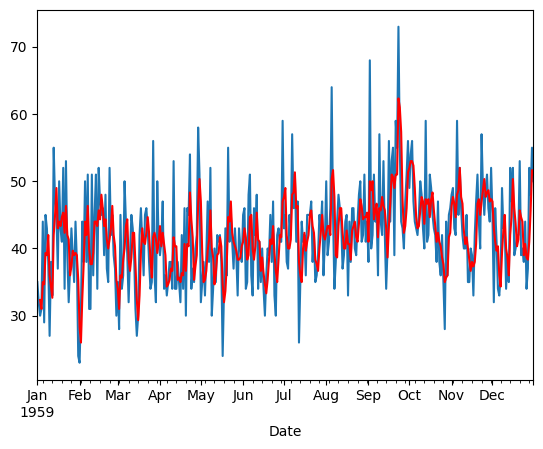

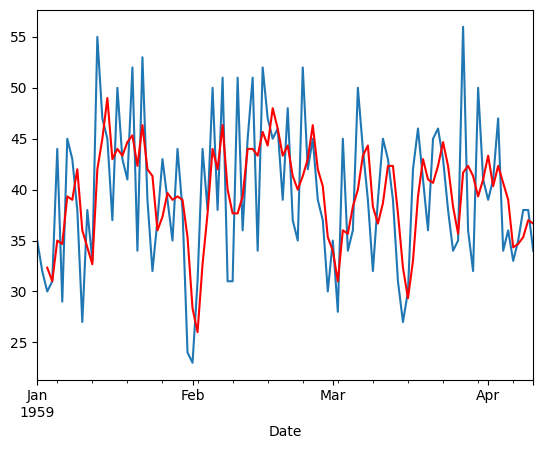

In [ ]:
# moving average smoothing as data preparation
from pandas import read_csv
from matplotlib import pyplot
series = pd.read_csv('daily-total-female-births.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
# tail-rolling average transform
rolling = series.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
series.plot()
rolling_mean.plot(color='red')
pyplot.show()
# zoomed plot original and transformed dataset
series[:100].plot()
rolling_mean[:100].plot(color='red')
pyplot.show()

## Moving Average as Feature Engineering




For example, with a window size of 3, we must shift the series forward by 2 time steps. This is because we want to include the previous two observations as well as the current observation in the moving average in order to predict the next value.

In [ ]:
# moving average smoothing as feature engineering
from pandas import read_csv
from pandas import DataFrame
from pandas import concat

series = pd.read_csv('daily-total-female-births.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')

df = DataFrame(series.values)
width = 3
lag1 = df.shift(1)
lag3 = df.shift(width - 1)
window = lag3.rolling(window=width)
means = window.mean()

dataframe = concat([means, lag1, df], axis=1)
dataframe.columns = ['mean', 't', 't+1']
print(dataframe.head(10))

        mean     t  t+1
0        NaN   NaN   35
1        NaN  35.0   32
2        NaN  32.0   30
3        NaN  30.0   31
4  32.333333  31.0   44
5  31.000000  44.0   29
6  35.000000  29.0   45
7  34.666667  45.0   43
8  39.333333  43.0   38
9  39.000000  38.0   27


## Moving Average as Prediction

predicted=32.333333, expected=31.000000
predicted=31.000000, expected=44.000000
predicted=35.000000, expected=29.000000
predicted=34.666667, expected=45.000000
predicted=39.333333, expected=43.000000
predicted=39.000000, expected=38.000000
predicted=42.000000, expected=27.000000
predicted=36.000000, expected=38.000000
predicted=34.333333, expected=33.000000
predicted=32.666667, expected=55.000000
predicted=42.000000, expected=47.000000
predicted=45.000000, expected=45.000000
predicted=49.000000, expected=37.000000
predicted=43.000000, expected=50.000000
predicted=44.000000, expected=43.000000
predicted=43.333333, expected=41.000000
predicted=44.666667, expected=52.000000
predicted=45.333333, expected=34.000000
predicted=42.333333, expected=53.000000
predicted=46.333333, expected=39.000000
predicted=42.000000, expected=32.000000
predicted=41.333333, expected=37.000000
predicted=36.000000, expected=43.000000
predicted=37.333333, expected=39.000000
predicted=39.666667, expected=35.000000


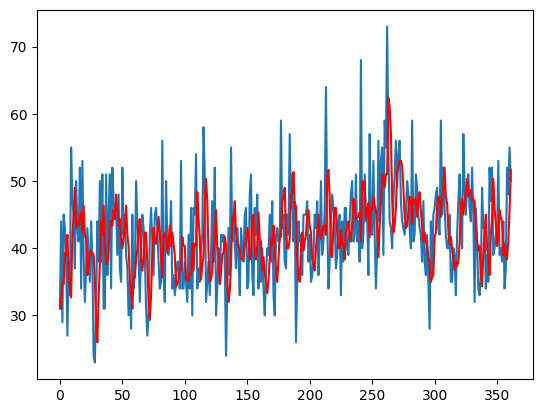

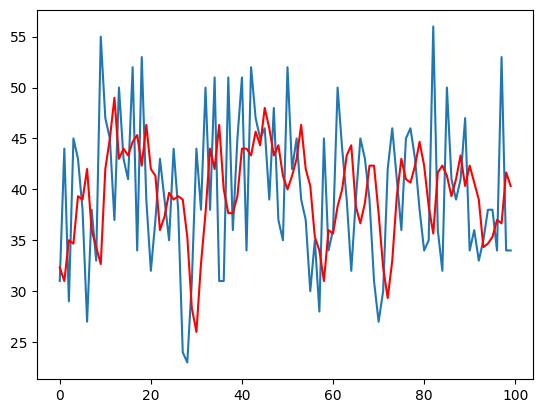

In [ ]:
# moving average smoothing as a forecast model
from math import sqrt
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

series = pd.read_csv('daily-total-female-births.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')

# prepare situation
X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

# walk forward over time steps in test
for t in range(len(test)):
  length = len(history)
  yhat = mean([history[i] for i in range(length-window,length)])
  obs = test[t]
  predictions.append(yhat)
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# zoom plot
pyplot.plot(test[:100])
pyplot.plot(predictions[:100], color='red')
pyplot.show()
# The results show a RMSE of nearly 7.834 births per day.

# Chapter 10 A Gentle Introduction to White Noise

count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64


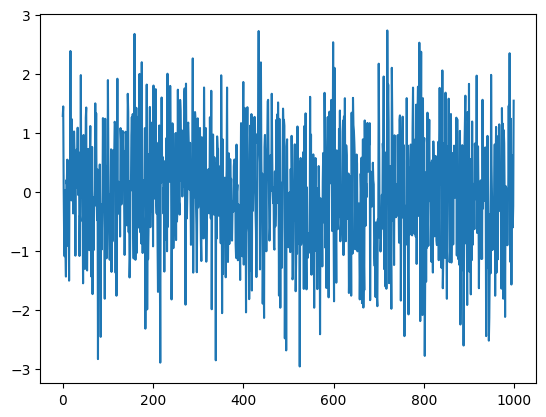

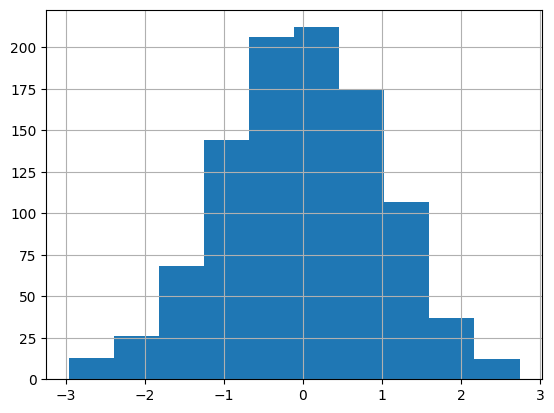

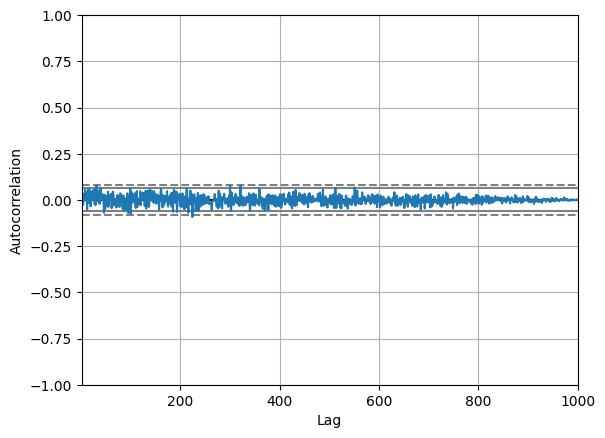

In [ ]:
# calculate and plot a white noise series
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
# seed random number generator
seed(1)
# create white noise series
series = [gauss(0.0, 1.0) for i in range(1000)]
series = Series(series)
# summary stats
print(series.describe())
# line plot
series.plot()
pyplot.show()
# histogram plot
series.hist()
pyplot.show()
# autocorrelation
autocorrelation_plot(series)
pyplot.show()

# Chapter 11 Random Walk

y(t) = B0 + B1 × X(t − 1) + e(t)

Where y(t) is the next value in the series. B0 is a coefficient that if set to a value other than zero adds a constant drift to the random walk. B1 is a coefficient to weight the previous time step and is set to 1.0. X(t-1) is the observation at the previous time step. e(t) is the white noise or random fluctuation at that time.

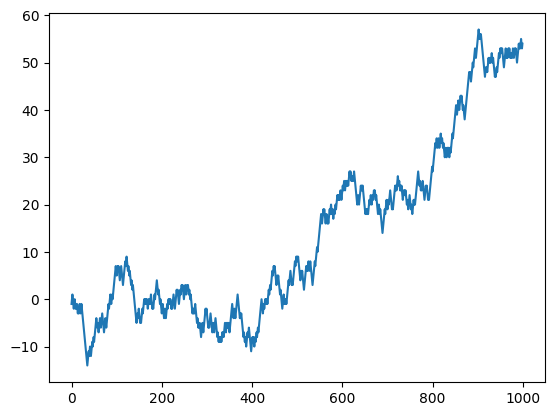

In [ ]:
# create and plot a random walk
from random import seed
from random import random
from matplotlib import pyplot
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
  movement = -1 if random() < 0.5 else 1
  value = random_walk[i-1] + movement
  random_walk.append(value)
pyplot.plot(random_walk)
pyplot.show()

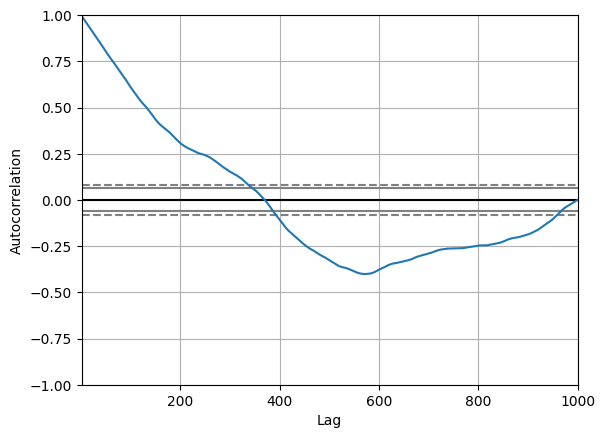

In [ ]:
# plot the autocorrelation of a random walk
from random import seed
from random import random
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
  movement = -1 if random() < 0.5 else 1
  value = random_walk[i-1] + movement
  random_walk.append(value)
autocorrelation_plot(random_walk)
pyplot.show()

In [ ]:
# calculate the stationarity of a random walk
from random import seed
from random import random
from statsmodels.tsa.stattools import adfuller
# generate random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
  movement = -1 if random() < 0.5 else 1
  value = random_walk[i-1] + movement
  random_walk.append(value)
# statistical test
result = adfuller(random_walk)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.341605
p-value: 0.979175
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


The null hypothesis of the test is that the time series is non-stationary. Running the example, we can see that the test statistic value was 0.341605. This is larger than all of the critical values at the 1%, 5%, and 10% confidence levels. Therefore, we can say that the time series does appear to be non-stationary with a low likelihood of the result being a statistical fluke.

Make the random walk stationary:

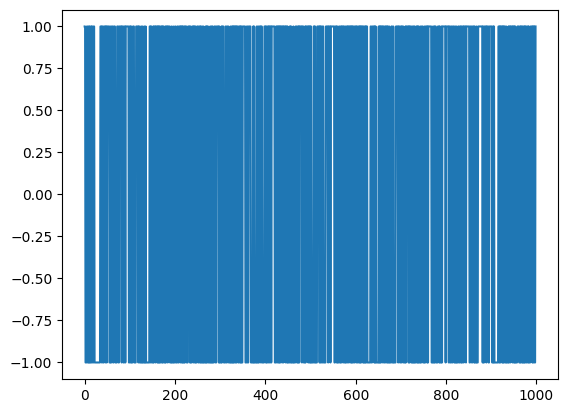

In [ ]:
# calculate and plot a differenced random walk
from random import seed
from random import random
from matplotlib import pyplot
# create random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
  movement = -1 if random() < 0.5 else 1
  value = random_walk[i-1] + movement
  random_walk.append(value)
# take difference
diff = list()
for i in range(1, len(random_walk)):
  value = random_walk[i] - random_walk[i - 1]
  diff.append(value)
# line plot
pyplot.plot(diff)
pyplot.show()

Notice there is no patern to the data.

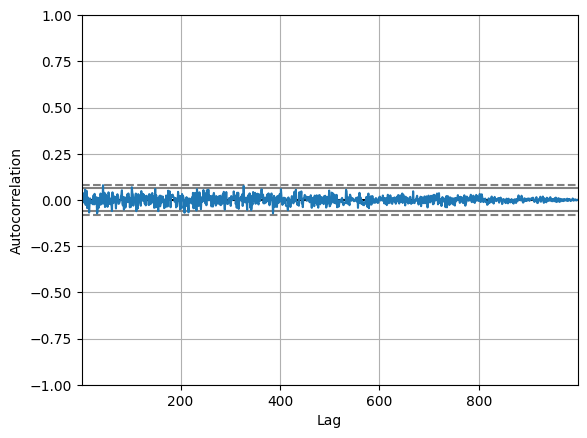

In [ ]:
# plot the autocorrelation of a differenced random walk
from random import seed
from random import random
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
# create random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
  movement = -1 if random() < 0.5 else 1
  value = random_walk[i-1] + movement
  random_walk.append(value)
# take difference
diff = list()
for i in range(1, len(random_walk)):
  value = random_walk[i] - random_walk[i - 1]
  diff.append(value)
# line plot
autocorrelation_plot(diff)
pyplot.show()

A random walk is unpredictable; it cannot reasonably be predicted.

In [ ]:
# persistence forecasts for a random walk
from random import seed
from random import random
from sklearn.metrics import mean_squared_error
from math import sqrt
# generate the random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
  movement = -1 if random() < 0.5 else 1
  value = random_walk[i-1] + movement
  random_walk.append(value)
# prepare dataset
train_size = int(len(random_walk) * 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]
# persistence
predictions = list()
history = train[-1]
for i in range(len(test)):
  yhat = history
  predictions.append(yhat)
  history = test[i]
rmse = sqrt(mean_squared_error(test, predictions))
print('Persistence RMSE: %.3f' % rmse)

Persistence RMSE: 1.000


Another error that beginners to the random walk make is to assume that if the range of
error (variance) is known, then we can make predictions using a random walk generation type
process. That is, if we know the error is either -1 or 1, then why not make predictions by adding
a randomly selected -1 or 1 to the previous value. We can demonstrate this random prediction
method in Python below.

In [ ]:
# random predictions for a random walk
from random import seed
from random import random
from sklearn.metrics import mean_squared_error
from math import sqrt
# generate the random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
  movement = -1 if random() < 0.5 else 1
  value = random_walk[i-1] + movement
  random_walk.append(value)
# prepare dataset
train_size = int(len(random_walk) * 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]
# random prediction
predictions = list()
history = train[-1]
for i in range(len(test)):
  yhat = history + (-1 if random() < 0.5 else 1)
  predictions.append(yhat)
  history = test[i]
rmse = sqrt(mean_squared_error(test, predictions))
print('Random RMSE: %.3f' % rmse)

Random RMSE: 1.328


Is Your Time Series a Random Walk?

* The time series shows a strong temporal dependence that decays linearly or in a similar pattern.
* The time series is non-stationary and making it stationary shows no obviously learnable structure in the data.
* The persistence model provides the best source of reliable predictions.

The human mind sees patterns everywhere and we must be vigilant that we are not fooling ourselves and wasting time by developing elaborate models for random walk processes.


# Chapter 12 Decompose Time Series Data

Real-world problems are messy and noisy. There may be additive and multiplicative
components. There may be an increasing trend followed by a decreasing trend. There may be
non-repeating cycles mixed in with the repeating seasonality components. Nevertheless, these
abstract models provide a simple framework that you can use to analyze your data and explore
ways to think about and forecast your problem.

Caution and healthy skepticism is needed when using automated decomposition methods.


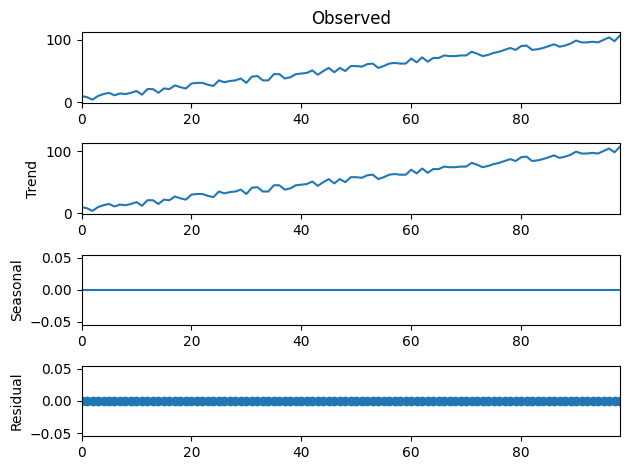

In [ ]:
# additive decompose a contrived additive time series
from random import randrange
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i+randrange(10) for i in range(1,100)]
result = seasonal_decompose(series, model='additive', period=1)
result.plot()
pyplot.show()

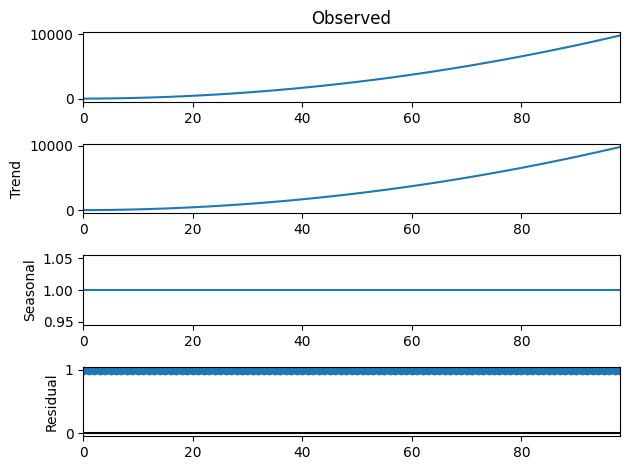

In [ ]:
# multiplicative decompose a contrived multiplicative time series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i**2.0 for i in range(1,100)]
result = seasonal_decompose(series, model='multiplicative', period=1)
result.plot()
pyplot.show()

Exponential changes can be made linear by data transforms. In this case, a quadratic trend
can be made linear by taking the square root. An exponential growth in seasonality may be
made linear by taking the natural logarithm.

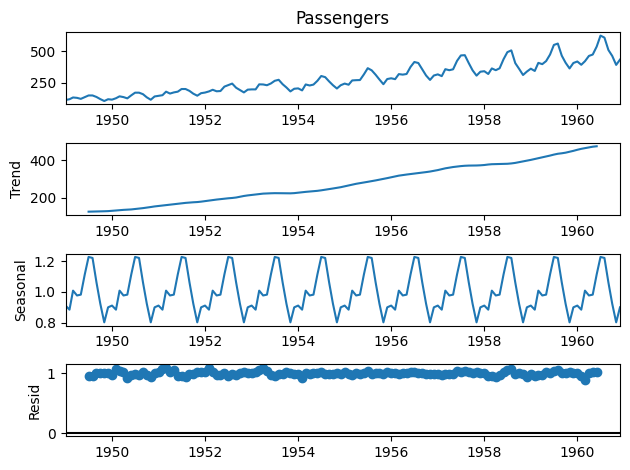

In [ ]:
# multiplicative decompose time series
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = read_csv('airline-passengers.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
result = seasonal_decompose(series, model='multiplicative')
result.plot()
pyplot.show()

# Chapter 13 Use and Remove Trends

[Data Set](https://github.com/jbrownlee/Datasets/blob/master/shampoo.csv)

<ipython-input-9-d6f0a66f3e2f>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


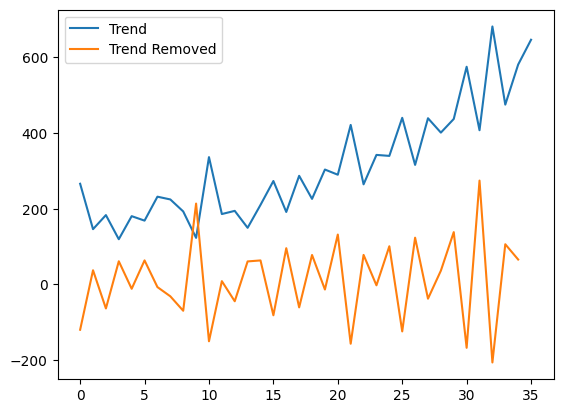

In [ ]:
# detrend a time series using differencing
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
def parser(x):
  return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
X = series.values
diff = list()
for i in range(1, len(X)):
  value = X[i] - X[i - 1]
  diff.append(value)
pyplot.plot(X)
pyplot.plot(diff)
pyplot.legend(['Trend','Trend Removed'])
pyplot.show()

<ipython-input-10-e451de27602b>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
<ipython-input-10-e451de27602b>:9: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True,


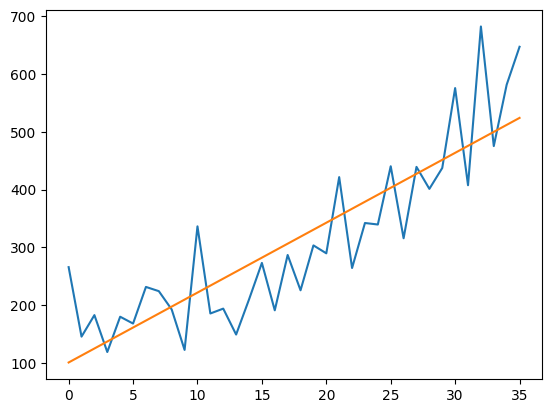

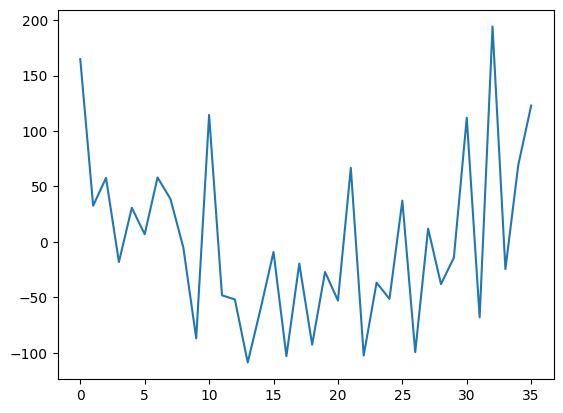

In [ ]:
# use a linear model to detrend a time series
from pandas import read_csv
from pandas import datetime
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import numpy
def parser(x):
  return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True,
squeeze=True, date_parser=parser)
# fit linear model
X = [i for i in range(0, len(series))]
X = numpy.reshape(X, (len(X), 1))
y = series.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
pyplot.plot(y)
pyplot.plot(trend)
pyplot.show()

# detrend
detrended = [y[i]-trend[i] for i in range(0, len(series))]
# plot detrended
pyplot.plot(detrended)
pyplot.show()

# Chapter 14 Use and Remove Seasonality

[Data Set](https://github.com/jbrownlee/Datasets/blob/master/daily-min-temperatures.csv)

Modeling seasonality and removing it from the time series may occur during data cleaning and preparation. Extracting seasonal information and providing it as input features, either directly or in summary form, may occur during feature
extraction and feature engineering activities.


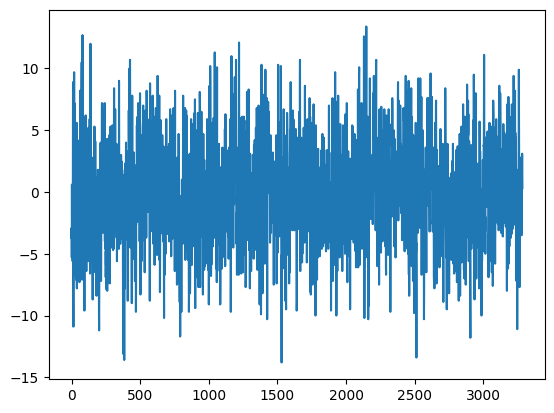

In [ ]:
# deseasonalize a time series using differencing
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
X = series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
  value = X[i] - X[i - days_in_year]
  diff.append(value)
pyplot.plot(diff)
pyplot.show()

There are two leap years in our dataset (1984 and 1988). They are not explicitly handled;
this means that observations in March 1984 onwards the offset are wrong by one day, and after
March 1988, the offsets are wrong by two days. One option is to update the code example to be
leap-day aware.
Another option is to consider that the temperature within any given period of the year
is probably stable. Perhaps over a few weeks. We can shortcut this idea and consider all
temperatures within a calendar month to be stable. An improved model may be to subtract the
average temperature from the same calendar month in the previous year, rather than the same
day. We can start off by resampling the dataset to a monthly average minimum temperature.


Date
1981-01-31    17.712903
1981-02-28    17.678571
1981-03-31    13.500000
1981-04-30    12.356667
1981-05-31     9.490323
1981-06-30     7.306667
1981-07-31     7.577419
1981-08-31     7.238710
1981-09-30    10.143333
1981-10-31    10.087097
1981-11-30    11.890000
1981-12-31    13.680645
1982-01-31    16.567742
Freq: M, Name: Temp, dtype: float64


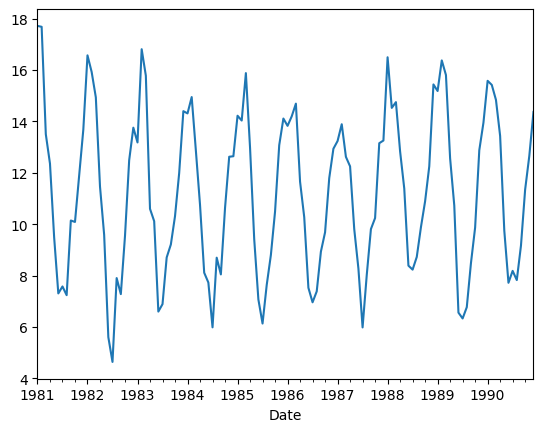

In [ ]:
# calculate and plot monthly average
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
resample = series.resample('M')
monthly_mean = resample.mean()
print(monthly_mean.head(13))
monthly_mean.plot()
pyplot.show()

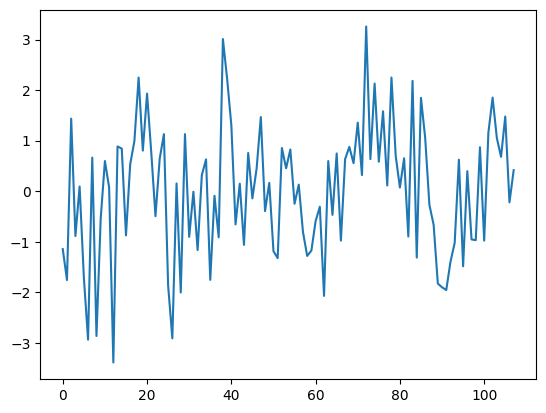

In [ ]:
# deseasonalize monthly data by differencing
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
resample = series.resample('M')
monthly_mean = resample.mean()
X = series.values
diff = list()
months_in_year = 12
for i in range(months_in_year, len(monthly_mean)):
  value = monthly_mean[i] - monthly_mean[i - months_in_year]
  diff.append(value)
pyplot.plot(diff)
pyplot.show()

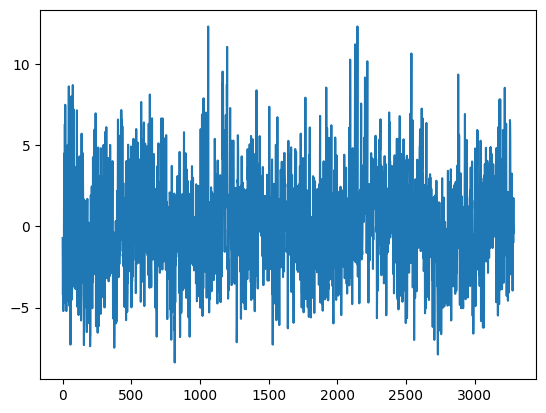

In [ ]:
# deseasonalize a time series using month-based differencing
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
X = series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
  month_str = str(series.index[i].year-1)+'-'+str(series.index[i].month)
  month_mean_last_year = series[month_str].mean()
  value = X[i] - month_mean_last_year
  diff.append(value)
pyplot.plot(diff)
pyplot.show()

Coefficients: [-1.17308000e-08  9.30253946e-06 -2.15977594e-03  1.19147966e-01
  1.38980178e+01]


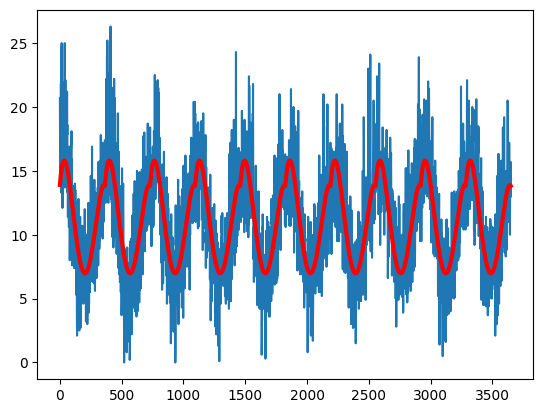

In [ ]:
# model seasonality with a polynomial model
from pandas import read_csv
from matplotlib import pyplot
from numpy import polyfit

series = read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')

# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(series))]
y = series.values
degree = 4
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)

# create curve
curve = list()
for i in range(len(X)):
  value = coef[-1]
  for d in range(degree):
    value += X[i]**(degree-d) * coef[d]
  curve.append(value)

# plot curve over original data
pyplot.plot(series.values)
pyplot.plot(curve, color='red', linewidth=3)
pyplot.show()

One limitation of this model is that it does not take into account of leap days, adding small
offset noise that could easily be corrected with an update to the approach. For example, we
could just remove the two February 29 observations from the dataset when creating the seasonal
model.

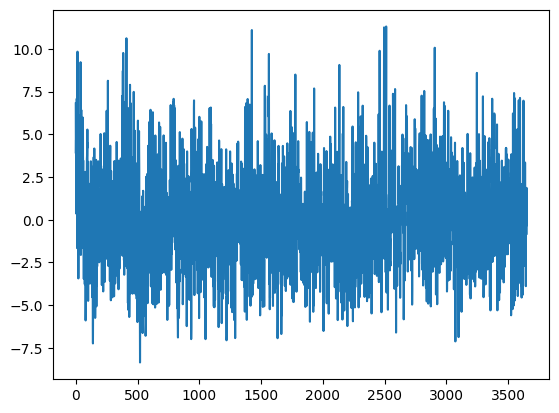

In [ ]:
# deseasonalize by differencing with a polynomial model
from pandas import read_csv
from matplotlib import pyplot
from numpy import polyfit

series = read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')

# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(series))]
y = series.values
degree = 4
coef = polyfit(X, y, degree)

# create curve
curve = list()
for i in range(len(X)):
  value = coef[-1]
  for d in range(degree):
    value += X[i]**(degree-d) * coef[d]
  curve.append(value)

# create seasonally adjusted
values = series.values
diff = list()
for i in range(len(values)):
  value = values[i] - curve[i]
  diff.append(value)
pyplot.plot(diff)
pyplot.show()

Running the example subtracts the values predicted by the seasonal model from the original
observations. The The seasonally adjusted dataset is then plotted.

# Chapter 15 Stationarity in Time Series Data

[Femail Data Set](https://github.com/jbrownlee/Datasets/blob/master/daily-total-female-births.csv)

[Airline Data Set](https://github.com/jbrownlee/Datasets/blob/master/airline-passengers.csv)

* **Stationary Process**: A process that generates a stationary series of observations.
* **Stationary Model**: A model that describes a stationary series of observations.
* **Trend Stationary**: A time series that does not exhibit a trend.
* **Seasonal Stationary**: A time series that does not exhibit seasonality.
* **Strictly Stationary**: A mathematical definition of a stationary process, specifically that the joint distribution of observations is invariant to time shift.

We turn to machine learning methods when the classical methods fail. When we want more or better results. We cannot know how to best model unknown nonlinear relationships in time series data and some methods may result in better performance when working with non-stationary observations or some mixture of stationary and non-stationary views of the
problem.


The suggestion here is to treat properties of a time series being stationary or not as another source of information that can be used in feature engineering and feature selection on your time series problem when using machine learning methods.

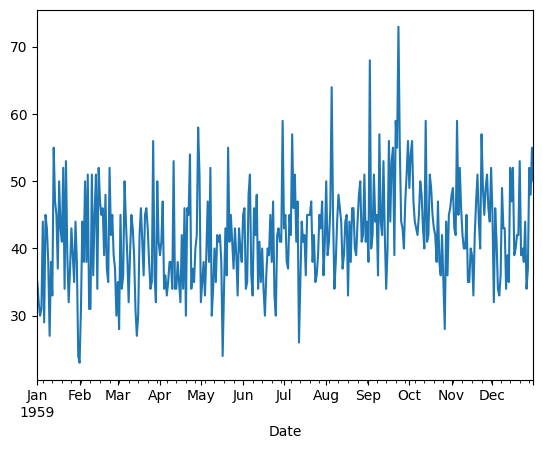

In [ ]:
# stationary time series
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('daily-total-female-births.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
series.plot()
pyplot.show()

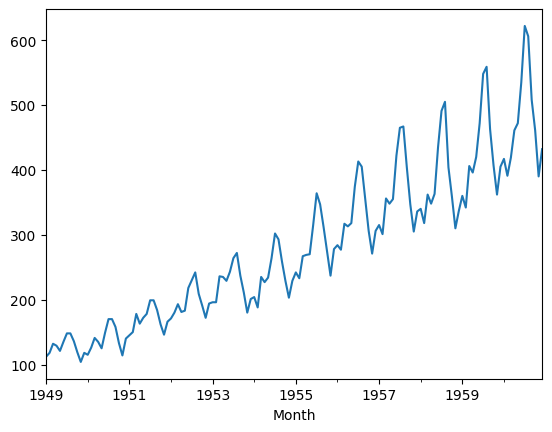

In [ ]:
# non-stationary time series
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('airline-passengers.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
series.plot()
pyplot.show()

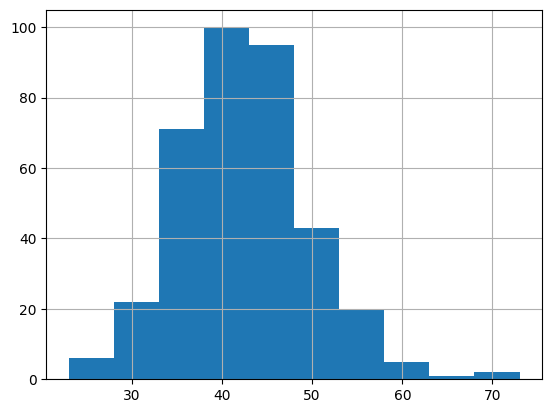

In [ ]:
# plot a histogram of a time series
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('daily-total-female-births.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
series.hist()
pyplot.show()

In [ ]:
# calculate statistics of partitioned time series data
from pandas import read_csv
series = read_csv('daily-total-female-births.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
X = series.values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))
# Running this example shows that the mean and variance values are different, but in the same ball-park.

mean1=39.763736, mean2=44.185792
variance1=49.213410, variance2=48.708651


In [ ]:
# calculate statistics of partitioned time series data
from pandas import read_csv
series = read_csv('airline-passengers.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
X = series.values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))
# Running the example, we can see the mean and variance look very different. We have a non-stationary time series.

mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


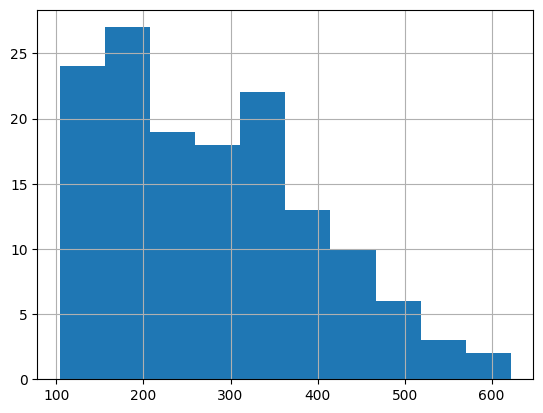

In [ ]:
# plot a histogram of a time series
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('airline-passengers.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
series.hist()
pyplot.show()

Running the example shows that indeed the distribution of values does not look like a
Gaussian, therefore the mean and variance values are less meaningful. This squashed distribution
of the observations may be another indicator of a non-stationary time series.

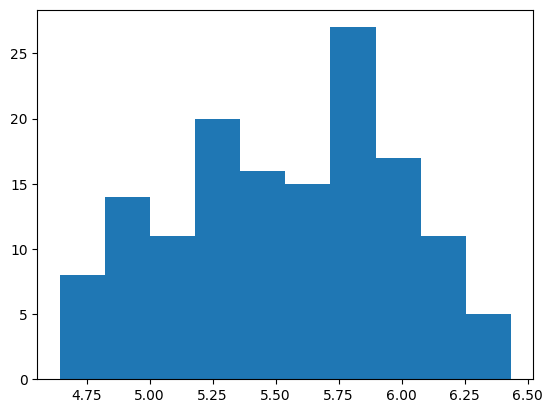

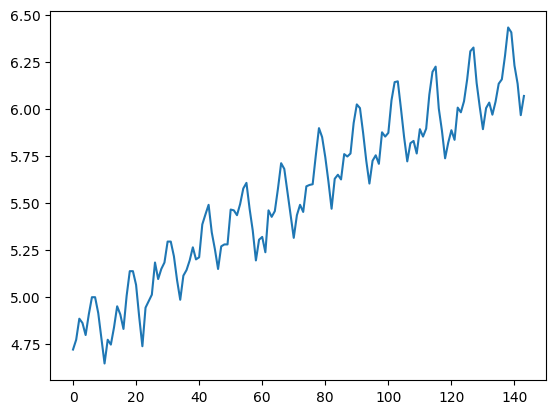

In [ ]:
# histogram and line plot of log transformed time series
from pandas import read_csv
from matplotlib import pyplot
from numpy import log
series = read_csv('airline-passengers.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
X = series.values
X = log(X)
pyplot.hist(X)
pyplot.show()
pyplot.plot(X)
pyplot.show()

In [ ]:
# calculate statistics of partitioned log transformed time series data
from pandas import read_csv
from numpy import log
series = read_csv('airline-passengers.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
X = series.values
X = log(X)
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=5.175146, mean2=5.909206
variance1=0.068375, variance2=0.049264


Augmented Dickey-Fuller test

* **Null (H0)**: Fail to reject, it suggests the time series has a unit root, meaning
it is non-stationary. It has some time dependent structure.
* **Alternate (H1)**: The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

In [ ]:
# calculate stationarity test of time series data
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
series = read_csv('airline-passengers.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [ ]:
# calculate stationarity test of log transformed time series data
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
from numpy import log
series = read_csv('airline-passengers.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
X = series.values
X = log(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.717017
p-value: 0.422367
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [ ]:
# calculate stationarity test of time series data
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
series = read_csv('daily-total-female-births.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
# unlike the airline data, this rejects the null hypothesis

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


# Chapter 16 Backtest/Hindtest Forecast Models

[Sunspot Data Set](https://github.com/jbrownlee/Datasets/blob/master/monthly-sunspots.csv)

Observations: 2820
Training Observations: 1861
Testing Observations: 959


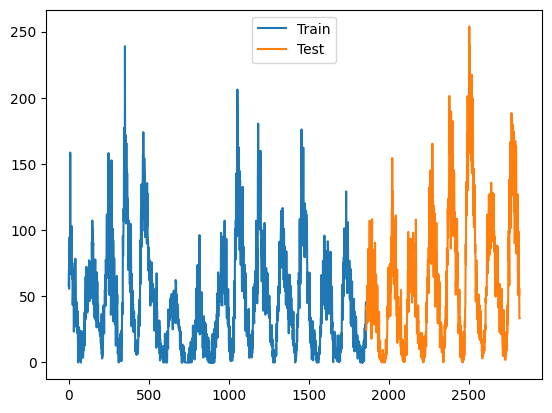

In [ ]:
# calculate and plot train-test split of time series data
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('monthly-sunspots.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
X = series.values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))
pyplot.plot(train)
pyplot.plot([None for i in train] + [x for x in test])
pyplot.legend(['Train','Test'])
pyplot.show()

Observations: 1410
Training Observations: 705
Testing Observations: 705
Observations: 2115
Training Observations: 1410
Testing Observations: 705
Observations: 2820
Training Observations: 2115
Testing Observations: 705


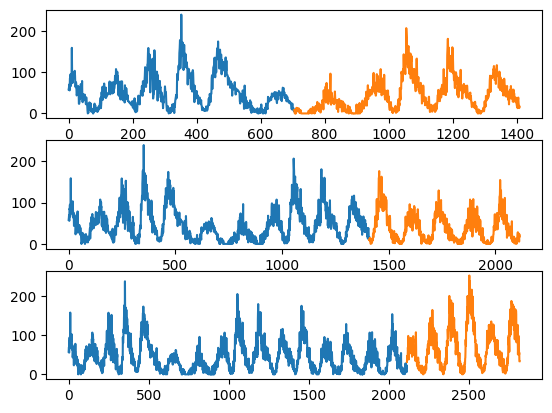

In [ ]:
# calculate repeated train-test splits of time series data
from pandas import read_csv
from sklearn.model_selection import TimeSeriesSplit
from matplotlib import pyplot
series = read_csv('monthly-sunspots.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
X = series.values
splits = TimeSeriesSplit(n_splits=3)
pyplot.figure(1)
index = 1
for train_index, test_index in splits.split(X):
  train = X[train_index]
  test = X[test_index]
  print('Observations: %d' % (len(train) + len(test)))
  print('Training Observations: %d' % (len(train)))
  print('Testing Observations: %d' % (len(test)))
  pyplot.subplot(310 + index)
  pyplot.plot(train)
  pyplot.plot([None for i in train] + [x for x in test])
  index += 1
pyplot.show()

Walk Forward Testing/Validation

1. Minimum Number of Observations. First, we must select the minimum number of
observations required to train the model. This may be thought of as the window width if
a sliding window is used (see next point).
2. Sliding or Expanding Window. Next, we need to decide whether the model will
be trained on all data it has available or only on the most recent observations. This
determines whether a sliding or expanding window will be used.

In [ ]:
# walk forward evaluation model for time series data
from pandas import read_csv
series = read_csv('monthly-sunspots.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
X = series.values
n_train = 500
n_records = len(X)
for i in range(n_train, n_records):
  train, test = X[0:i], X[i:i+1]
  print('train=%d, test=%d' % (len(train), len(test)))

train=500, test=1
train=501, test=1
train=502, test=1
train=503, test=1
train=504, test=1
train=505, test=1
train=506, test=1
train=507, test=1
train=508, test=1
train=509, test=1
train=510, test=1
train=511, test=1
train=512, test=1
train=513, test=1
train=514, test=1
train=515, test=1
train=516, test=1
train=517, test=1
train=518, test=1
train=519, test=1
train=520, test=1
train=521, test=1
train=522, test=1
train=523, test=1
train=524, test=1
train=525, test=1
train=526, test=1
train=527, test=1
train=528, test=1
train=529, test=1
train=530, test=1
train=531, test=1
train=532, test=1
train=533, test=1
train=534, test=1
train=535, test=1
train=536, test=1
train=537, test=1
train=538, test=1
train=539, test=1
train=540, test=1
train=541, test=1
train=542, test=1
train=543, test=1
train=544, test=1
train=545, test=1
train=546, test=1
train=547, test=1
train=548, test=1
train=549, test=1
train=550, test=1
train=551, test=1
train=552, test=1
train=553, test=1
train=554, test=1
train=555,

See also [tfresh Rolling/Time series forcasting](https://tsfresh.readthedocs.io/en/latest/text/forecasting.html)

# Chapter 17 Forecasting Performance Measures

Squaring the forecast error values forces them to be positive; it also has the effect of putting more weight on large errors. Very large or outlier forecast errors are squared, which in turn has the effect of dragging the mean of the squared forecast errors out resulting in a larger mean squared error score. In effect, the score gives worse performance to those models that make large wrong forecasts.


In [2]:
# calculate root mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]
mse = mean_squared_error(expected, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.148324


# Chapter 18 Persistence Model for Forecasting

[Shampoo Data Set](https://github.com/jbrownlee/Datasets/blob/master/shampoo.csv)

Three properties of a good technique for making a baseline forecast are:
* Simple: A method that requires little or no training or intelligence.
* Fast: A method that is fast to implement and computationally trivial to make a prediction.
* Repeatable: A method that is deterministic, meaning that it produces an expected
output given the same input.


<ipython-input-1-453959eec95a>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


       t    t+1
0    NaN  266.0
1  266.0  145.9
2  145.9  183.1
3  183.1  119.3
4  119.3  180.3
Test RMSE: 133.156


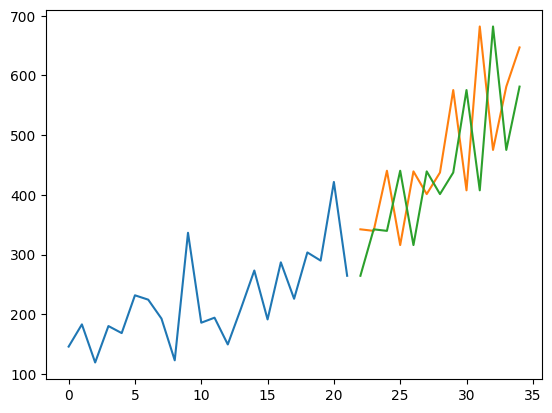

In [1]:
# evaluate a persistence forecast model
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
def parser(x):
  return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')

# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe.head(5))

# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
  return x

# walk-forward validation
predictions = list()
for x in test_X:
  yhat = model_persistence(x)
  predictions.append(yhat)
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)

# plot predictions and expected results
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()


# Chapter 19 Visualize Residual Forecast Errors

[Births Data Set](https://github.com/jbrownlee/Datasets/blob/master/daily-total-female-births.csv)

      0
0   9.0
1 -10.0
2   3.0
3  -6.0
4  30.0


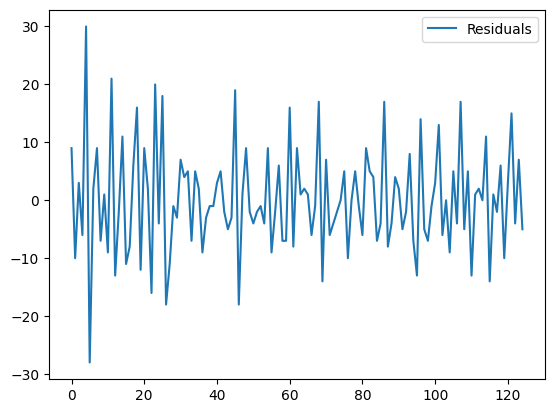

In [7]:
# line plot of residual errors
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
series = read_csv('daily-total-female-births.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]

# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
# plot residuals
print(residuals.head())
residuals.plot()
pyplot.legend(['Residuals'])
pyplot.show()


In [8]:
# summary statistics of residual errors
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('daily-total-female-births.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)

# summary statistics
print(residuals.describe())


                0
count  125.000000
mean     0.064000
std      9.187776
min    -28.000000
25%     -6.000000
50%     -1.000000
75%      5.000000
max     30.000000


A naive error correction could be adding the residual mean error (0.064) to the forcast.

\# correct the prediction <br>
yhat = yhat + pred_error

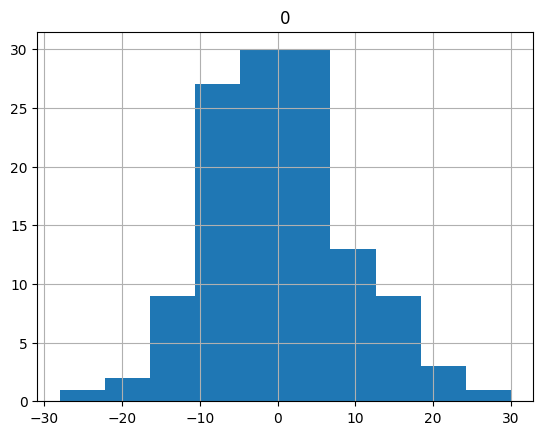

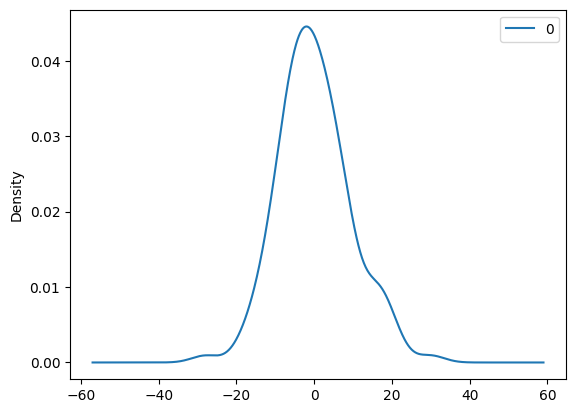

In [9]:
# density plots of residual errors
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
series = read_csv('daily-total-female-births.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)

# histogram plot
residuals.hist()
pyplot.show()
# density plot
residuals.plot(kind='kde')
pyplot.show()


If the plot showed a distribution
that was distinctly non-Gaussian, it would suggest that assumptions made by the modeling
process were perhaps incorrect and that a different modeling method may be required. A large
skew may suggest the opportunity for performing a transform to the data prior to modeling,
such as taking the log or square root.

[statsmodels.graphics.gofplots.qqplot](https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html)

A Q-Q plot, or quantile plot, compares two distributions and can be used to see how similar ordifferent they happen to be.

The Q-Q plot can be used to quickly check the normality of the distribution of residual errors. The values are ordered and compared to an idealized Gaussian distribution. The comparison is shown as a scatter plot (theoretical on the x-axis and observed on the y-axis) where a match between the two distributions is shown as a diagonal line from the bottom left to the top-right of the plot.

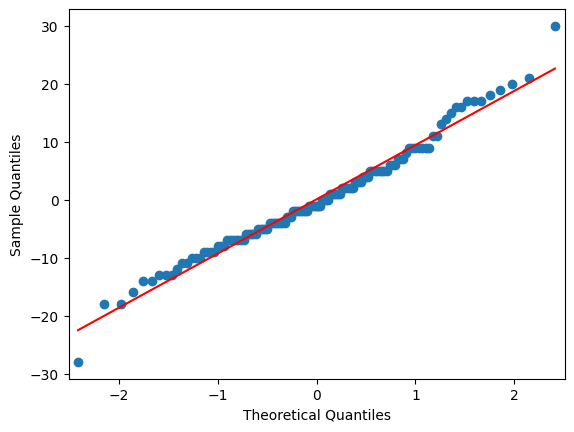

In [10]:
# qq plot of residual errors
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
import numpy
from statsmodels.graphics.gofplots import qqplot
series = read_csv('daily-total-female-births.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]

# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = numpy.array(residuals)
qqplot(residuals, line='r')
pyplot.show()

**Residual Autocorrelation Plot**

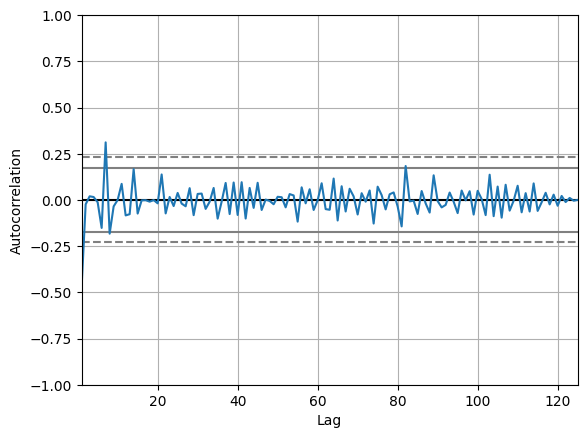

In [11]:
# autoregression plot of residual errors
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
series = read_csv('daily-total-female-births.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]

# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
autocorrelation_plot(residuals)
pyplot.show()


We would not expect there to be any correlation between the residuals. This would be shown by autocorrelation scores being below the threshold of significance (dashed and dotted horizontal lines on the plot).


# Chapter 20 Reframe Time Series Forecasting Problems

[Temperature Data Set](https://github.com/jbrownlee/Datasets/blob/master/daily-min-temperatures.csv)



**Regression Framings**

* Forecast the change in the minimum temperature compared to the previous day.
* Forecast the minimum temperature relative to the average from the past 14 days.
* Forecast the minimum temperature relative to the average the same month last year.
* Forecast the minimum temperature rounded to the nearest 5 degrees Celsius.
* Forecast the average minimum temperature for the next 7 days.

Below is an example of reframing the Minimum Daily Temperatures forecast problem to predict
the daily temperature rounded to the nearest 5 degrees.

In [12]:
# reframe precision of regression forecast
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
# load data
series = read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# round forecast to nearest 5
for i in range(len(dataframe['t+1'])):
  dataframe['t+1'][i] = int(dataframe['t+1'][i] / 5) * 5.0
print(dataframe.head(5))

      t   t+1
0   NaN  20.0
1  20.7  15.0
2  17.9  15.0
3  18.8  10.0
4  14.6  15.0


**Classification Framings**
* Forecast whether a minimum temperature will be cold, moderate, or warm.
* Forecast whether a change in minimum temperature will be small or large.
* Forecast whether the minimum temperature will be a monthly minimum or not.
* Forecast whether the minimum will be higher or lower than the minimum in the previous
year.
* Forecast whether the minimum temperature will rise or fall over the next 7 days.

Example clasification:

* 0 (cold): < 10 degrees Celsius.
* 1 (moderate): ≥ 10 and < 25 degrees Celsius.
* 2 (hot): ≥ 25 degrees Celsius.

In [14]:
# reframe regression as classification
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
# load data
series = read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
# Create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# make discrete
for i in range(len(dataframe['t+1'])):
  value = dataframe['t+1'][i]
  if value < 10.0:
    dataframe['t+1'][i] = 0
  elif value >= 25.0:
    dataframe['t+1'][i] = 2
  else:
    dataframe['t+1'][i] = 1
print(dataframe.head(5))


      t  t+1
0   NaN  1.0
1  20.7  1.0
2  17.9  1.0
3  18.8  1.0
4  14.6  1.0


**Time Horizon Framings**
* Forecast the minimum temperature for the next 7 days.
* Forecast the minimum temperature in 30 days time.
* Forecast the average minimum temperature next month.
* Forecast the day in the next week that will have the lowest minimum temperature.
* Forecast one year of minimum temperature values.

In [15]:
# reframe time horizon of forecast
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
# load data
series = read_csv('daily-min-temperatures.csv', parse_dates=True, header=0,index_col=0, on_bad_lines='skip').squeeze('columns')
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values, values.shift(-1),
values.shift(-2), values.shift(-3), values.shift(-4), values.shift(-5),
values.shift(-6)], axis=1)
dataframe.columns = ['t', 't+1', 't+2', 't+3', 't+4', 't+5', 't+6', 't+7']
print(dataframe.head(14))

       t   t+1   t+2   t+3   t+4   t+5   t+6   t+7
0    NaN  20.7  17.9  18.8  14.6  15.8  15.8  15.8
1   20.7  17.9  18.8  14.6  15.8  15.8  15.8  17.4
2   17.9  18.8  14.6  15.8  15.8  15.8  17.4  21.8
3   18.8  14.6  15.8  15.8  15.8  17.4  21.8  20.0
4   14.6  15.8  15.8  15.8  17.4  21.8  20.0  16.2
5   15.8  15.8  15.8  17.4  21.8  20.0  16.2  13.3
6   15.8  15.8  17.4  21.8  20.0  16.2  13.3  16.7
7   15.8  17.4  21.8  20.0  16.2  13.3  16.7  21.5
8   17.4  21.8  20.0  16.2  13.3  16.7  21.5  25.0
9   21.8  20.0  16.2  13.3  16.7  21.5  25.0  20.7
10  20.0  16.2  13.3  16.7  21.5  25.0  20.7  20.6
11  16.2  13.3  16.7  21.5  25.0  20.7  20.6  24.8
12  13.3  16.7  21.5  25.0  20.7  20.6  24.8  17.7
13  16.7  21.5  25.0  20.7  20.6  24.8  17.7  15.5


# Chapter 21 A Gentle Introduction to the Box-Jenkins Method (ARIMA)